## Первая часть нашей второй части

> Сравним систему ценообразования ГАУ РМ «Ледовый дворец» на сопоставимые с АУ РМ «СК «Мордовия» услуги. Известно, что и то, и другое спортивное учреждение предоставляет скидки для студентов, школьников и пенсионеров, а также на посещение в те часы, когда не наблюдается большого наплыва. Сравним это более наглядно, с помощью визуализации matplotlib.

> Для начала импортируем библиотеки pandas, numpy и matplotlib, для дальнейшей работы с данными. Получим имеющие данные из csv файла и сделаем из него DataFrames.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
df = pd.read_csv("Сравнительная таблица-1.csv", sep=';', encoding='windows-1251')
df

,Спортивный комплекс,Предоставляемая услуга,Количество занятий,Стоимость
0,ГАУ РМ «Ледовый дворец»,Тренажерный зал,1 занятие,250
1,ГАУ РМ «Ледовый дворец»,Тренажерный зал,Клуб карта на 1 мес,1600
2,ГАУ РМ «Ледовый дворец»,Тренажерный зал,льготный 1 мес,800
3,ГАУ РМ «Ледовый дворец»,Тренажерный зал,Абонемент на 3 мес,4500
4,ГАУ РМ «Ледовый дворец»,Тренажерный зал,Абонемент на 6 мес,8500
5,АУ РМ «СК «Мордовия,Тренажерный зал,1 занятие,350
6,АУ РМ «СК «Мордовия,Тренажерный зал,Клуб карта на 1 мес,2100
7,АУ РМ «СК «Мордовия,Тренажерный зал,льготный 1 мес,1050
8,АУ РМ «СК «Мордовия,Тренажерный зал,Абонемент на 3 мес,5000
9,АУ РМ «СК «Мордовия,Тренажерный зал,Абонемент на 6 мес,9000


In [189]:
grouped = df.groupby('Спортивный комплекс')
grouped.groups
grouped.sum()

,Предоставляемая услуга,Количество занятий,Стоимость
Спортивный комплекс,,,
АУ РМ «СК «Мордовия,Тренажерный залТренажерный залТренажерный залТ...,1 занятиеКлуб карта на 1 месльготный 1 мес ...,34915
ГАУ РМ «Ледовый дворец»,Тренажерный залТренажерный залТренажерный залТ...,1 занятиеКлуб карта на 1 месльготный 1 мес ...,32717


Для дальнейшей визуализации необходимо сгруппировать данные. Сделаю это с помощью crosstab. 

In [114]:
data = pd.crosstab(index=df['Предоставляемая услуга'],
                    columns=df['Спортивный комплекс'], 
                    values=df['Стоимость'], 
                    aggfunc='mean').reset_index()
data.head()

Спортивный комплекс,Предоставляемая услуга,АУ РМ «СК «Мордовия,ГАУ РМ «Ледовый дворец»
0,Солярий,307.5,458.5
1,Тренажерный зал,3500.0,3130.0
2,Фитнес,3360.0,3230.0


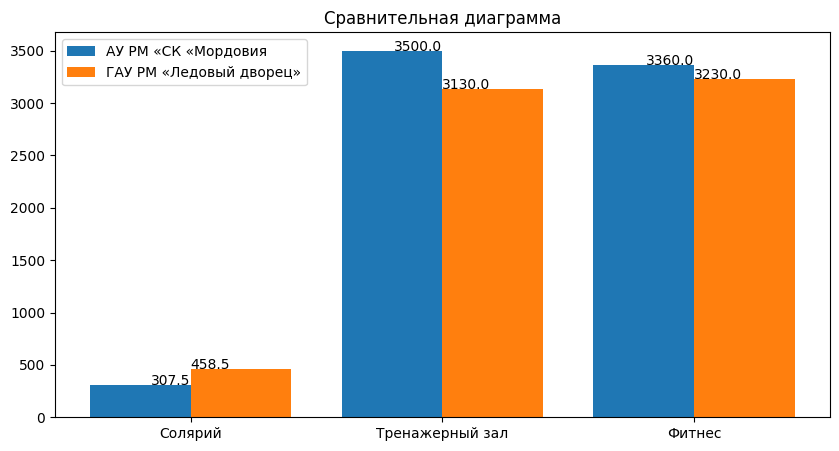

In [179]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'right')   
        plt.text(i, y1[i], y1[i], ha = 'left')
 
if __name__ == '__main__':
        x = data['Предоставляемая услуга']
        y = data["АУ РМ «СК «Мордовия"]
        y1 = data["ГАУ РМ «Ледовый дворец»"]

plt.figure(figsize=(10,5))
n_ticks = np.arange(len(data['Предоставляемая услуга']))
offset = 0.2
w = 0.4
a = plt.bar(n_ticks - offset, data["АУ РМ «СК «Мордовия"], width=w)
b = plt.bar(n_ticks + offset, data["ГАУ РМ «Ледовый дворец»"], width=w)
plt.title('Сравнительная диаграмма')
plt.legend(['АУ РМ «СК «Мордовия', 'ГАУ РМ «Ледовый дворец»'])
plt.xticks(n_ticks, data['Предоставляемая услуга'], rotation= 0)
addlabels(x,y)

In [ ]:
a_group = df['Стоимость'][df['Спортивный комплекс'] == 'ГАУ РМ «Ледовый дворец»']
b_group = df['Стоимость'][df['Спортивный комплекс'] == 'АУ РМ «СК «Мордовия']
a_group

In [ ]:
import scipy
from scipy import stats

In [ ]:
# распределение не является нормальным так как pvalue < альфы

scipy.stats.shapiro(a_group)
scipy.stats.shapiro(b_group)

In [ ]:
# по результатам данного теста, можно сделать вывод, что статистически значимых различий в цене не обнаружено

stats.ttest_ind(a_group, b_group)